## Тема “Обучение без учителя”

### Задание 1
* Импортируйте библиотеки pandas, numpy и matplotlib.
* Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
* Создайте датафреймы X и y из этих данных.
* Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
* Масштабируйте данные с помощью StandardScaler.
* Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
* Постройте диаграмму рассеяния на этих данных.


In [1]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')

# Загрузка датасета
from sklearn.datasets import load_boston

# Разделение датасета на выборки
from sklearn.model_selection import train_test_split

# Маштабирование модели
from sklearn.preprocessing import StandardScaler

# Загрузка алгоритма t-SNE для модели
from sklearn.manifold import TSNE

# Загрузка алгоритма кластеризации
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [4]:
X = pd.DataFrame(data, columns=feature_names)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
y = pd.DataFrame(target, columns=['price'])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [6]:
# Разбивка датафреймов Х и у на выборки.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Масштабирование данных

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [8]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [9]:
# Создание модели t-SNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'Количество признаков до: {X_train_scaled.shape}')
print(f'Количество признаков после: {X_train_tsne.shape}')

Количество признаков до: (404, 13)
Количество признаков после: (404, 2)


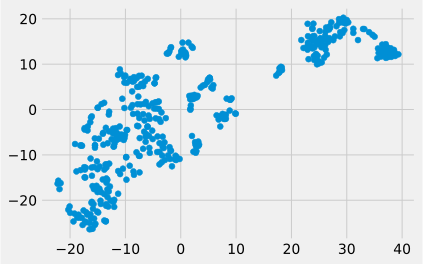

In [10]:
# Построение диаграммы рассеяния на полученных данных

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
* Вычислите средние значения price и CRIM в разных кластерах.


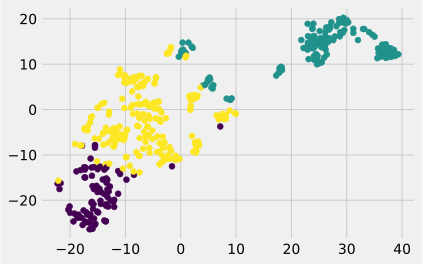

In [11]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [12]:
set(labels_train)

{0, 1, 2}

In [13]:
crim_mean_value_0 = X_train.loc[labels_train == 0, 'CRIM'].mean()
price_mean_value_0 = y_train.loc[labels_train == 0, 'price'].mean()

crim_mean_value_1 = X_train.loc[labels_train == 1, 'CRIM'].mean()
price_mean_value_1 = y_train.loc[labels_train == 1, 'price'].mean()

crim_mean_value_2 = X_train.loc[labels_train == 2, 'CRIM'].mean()
price_mean_value_2 = y_train.loc[labels_train == 2, 'price'].mean()

print(f'Кластер 0: Mean "price" - {price_mean_value_0:.3f}, Mean "CRIM" - {crim_mean_value_0:.3f}')
print(f'Кластер 1: Mean "price" - {price_mean_value_1:.3f}, Mean "CRIM" - {crim_mean_value_1:.3f}')
print(f'Кластер 2: Mean "price" - {price_mean_value_2:.3f}, Mean "CRIM" - {crim_mean_value_2:.3f}')

Кластер 0: Mean "price" - 27.788, Mean "CRIM" - 0.074
Кластер 1: Mean "price" - 16.165, Mean "CRIM" - 10.797
Кластер 2: Mean "price" - 24.958, Mean "CRIM" - 0.422


### Задание 3
* Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
* Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [14]:
labels_test = kmeans.predict(X_test_scaled)

In [15]:
crim_mean_value_0_test = X_test.loc[labels_test == 0, 'CRIM'].mean()
price_mean_value_0_test = y_test.loc[labels_test == 0, 'price'].mean()

crim_mean_value_1_test = X_test.loc[labels_test == 1, 'CRIM'].mean()
price_mean_value_1_test = y_test.loc[labels_test == 1, 'price'].mean()

crim_mean_value_2_test = X_test.loc[labels_test == 2, 'CRIM'].mean()
price_mean_value_2_test = y_test.loc[labels_test == 2, 'price'].mean()

print(f'Кластер 0: Mean "price" - {price_mean_value_0_test:.3f}, Mean "CRIM" - {crim_mean_value_0_test:.3f}')
print(f'Кластер 1: Mean "price" - {price_mean_value_1_test:.3f}, Mean "CRIM" - {crim_mean_value_1_test:.3f}')
print(f'Кластер 2: Mean "price" - {price_mean_value_2_test:.3f}, Mean "CRIM" - {crim_mean_value_2_test:.3f}')

Кластер 0: Mean "price" - 31.350, Mean "CRIM" - 0.062
Кластер 1: Mean "price" - 16.437, Mean "CRIM" - 10.166
Кластер 2: Mean "price" - 21.861, Mean "CRIM" - 0.266
